In [2]:
from scipy.optimize import minimize 
import numpy as np
import pandas as pd
df=pd.read_csv("dataset A.csv")
x = df['X'].values
y = df['Y'].values
xSqr=x*x
xCube=x*x*x


In [3]:
def mse_lossSquare(params, xSqr,x, y): 
    a,b, c = params 
    y_hat = a* xSqr+b*x + c 
    mseSqr=(y-y_hat)*(y-y_hat)
    return np.mean(mseSqr)

def mse_lossCube(params, xCube,xSqr,x, y): 
    a,b,c,d = params 
    y_hat = a* xCube+b*xSqr + c*x+ d
    mseCube=(y-y_hat)*(y-y_hat)
    return np.mean(mseCube)

In [4]:
initial_guess = [0, 0, 0] 
result_mse = minimize(mse_lossSquare, initial_guess, args=(xSqr,x, y)) 
a_mseSqr, b_mseSqr, c_mseSqr = result_mse.x 

initial_guess = [0, 0, 0, 0] 
result_mse = minimize(mse_lossCube, initial_guess, args=(xCube,xSqr,x, y)) 
a_mseCube, b_mseCube, c_mseCube, d_mscCube = result_mse.x 



In [5]:
def analyze_lineSqr(x,y,a_mseSqr, b_mseSqr, c_mseSqr): 

    y_predSqr = a_mseSqr* xSqr+b_mseSqr*x + c_mseSqr 
    residuals = y - y_predSqr
    return residuals

def analyze_lineCube(x,y,a_mseCube, b_mseCube, c_mseCube, d_mscCube): 
    y_predCube = a_mseCube* xCube+b_mseCube*xSqr + c_mseCube*x+ d_mscCube
    residuals = y - y_predCube
    return residuals

1. Separating datapoints above and below the curve for power two

In [6]:
m=0
n=0
mr=np.ones(2000)
nr=np.ones(2000)
p=list(range(0,2000))
r=analyze_lineSqr(x,y,a_mseSqr, b_mseSqr, c_mseSqr)
print(r)
for i in p:
    if r[i]>0:
        m=m+1
        mr=r[i]
    if r[i]<0:
        n=n+1
        nr=r[i]

[ 4.78943308  3.20414963  7.45263834 ... -6.30296485  0.62354642
 -7.07154788]


1. Calculating mean of data points above the Best fit curve 

In [7]:
meanAboveResi=np.mean(mr)
meanAboveResi

np.float64(0.6235464201600422)

1. Calculating mean of data points Below the Best fit curve 

In [8]:
meanBelowResi=np.mean(nr)
meanBelowResi

np.float64(-7.071547884835182)

In [9]:
m=0
n=0
mr=np.ones(2000)
nr=np.ones(2000)
p=list(range(0,2000))
r=analyze_lineCube(x,y,a_mseCube, b_mseCube, c_mseCube, d_mscCube)
print(r)
for i in p:
    if r[i]>0:
        m=m+1
        mr[i]=r[i]
    if r[i]<0:
        n=n+1
        nr[i]=r[i]

[ 4.79524767  3.18646767  7.42462254 ... -6.27428315  0.56793116
 -7.1009176 ]


In [10]:
meanAboveResi=np.mean(mr)
meanAboveResi

np.float64(3.048162828968726)

In [11]:
meanBelowResi=np.mean(nr)
meanBelowResi

np.float64(-2.0481629969700372)

In [12]:
import matplotlib.pyplot as plt
y_pred=m_mae*x+c_mae
y_pred1=m_mse*x+c_mse
plt.figure(figsize=(10,10))
plt.scatter(x,y,color="blue",alpha=0.5,label='Original Data')
plt.plot(x, y_pred, color='red', linewidth=2, label=f'Fit: y = {m_mae:.2f}x + {c_mae:.2f}') 
plt.plot(x, y_pred1, color='green', linewidth=2, label=f'Fit: y = {m_mse:.2f}x + {c_mse:.2f}') 
plt.title('Linear Regression using scipy.optimize.minimize', fontsize=14) 
plt.xlabel('x', fontsize=12) 
plt.ylabel('y', fontsize=12) 
plt.legend() 
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

NameError: name 'm_mae' is not defined

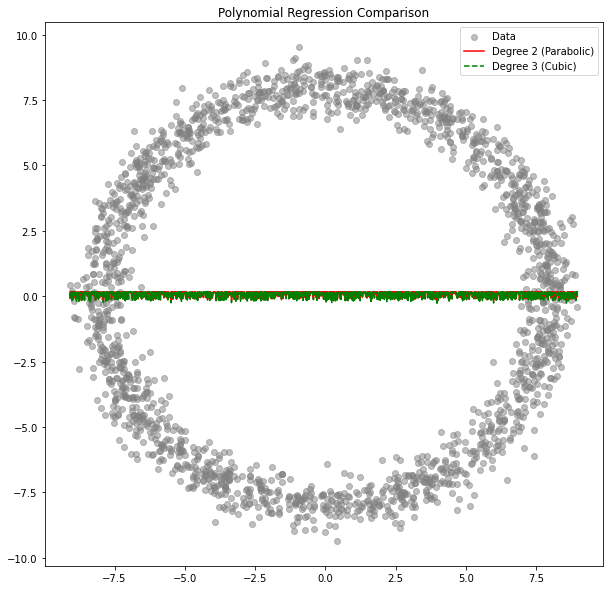

In [14]:
import matplotlib.pyplot as plt
x_range = np.linspace(df['X'].min(), df['X'].max(), 2000)
y_predSqr1 = a_mseSqr* xSqr+b_mseSqr*x + c_mseSqr 
y_predCube1 = a_mseCube* xCube+b_mseCube*xSqr + c_mseCube*x+ d_mscCube
plt.figure(figsize=(10,10)) 
plt.scatter(df['X'], df['Y'], color='gray', alpha=0.5, label='Data') 
plt.plot(x_range, y_predSqr1, color='red', label='Degree 2 (Parabolic)') 
plt.plot(x_range, y_predCube1, color='green', label='Degree 3 (Cubic)', linestyle='--') 
plt.legend() 
plt.title("Polynomial Regression Comparison") 
plt.show() 

In [15]:
l=0
k=0
l1=0
k1=0
for i in p:
    if y_predSqr[i]>y[i]:
        k=k+1
    if y_predSqr[i]<y[i]:
        l=l+1
for i in p:
    if y_predCube[i]>y[i]:
        k1=k1+1
    if y_predCube[i]<y[i]:
        l1=l1+1
print("MAE counts above line {}".format(l))
print("MAE counts below line {}".format(k))
print("MSE counts above line {}".format(l1))
print("MSE counts below line {}".format(k1))

NameError: name 'y_predSqr' is not defined

In [ ]:
import statistics
L=list(range(0,2000))
K=list(range(0,2000))
L1=list(range(0,2000))
K1=list(range(0,2000))
for i in p:
    K[i]=0
    L[i]=0
    if y_pred[i]>y[i]:
        K[i]=(abs(y_pred[i]-y[i]))   
    if y_pred[i]<y[i]:
        L[i]=(abs(y_pred[i]-y[i]))
for i in p:
    K1[i]=0
    L1[i]=0
    if y_pred1[i]>y[i]:
        K1[i]=(abs(y_pred1[i]-y[i]))
    if y_pred1[i]<y[i]:
        L1[i]=(abs(y_pred1[i]-y[i]))
print("MAE mean distance above line {}".format(statistics.mean(L)))
print("MAE mean distance below line {}".format(statistics.mean(K)))
print("MSE mean distance above line {}".format(statistics.mean(L1)))
print("MSE mean distance below line {}".format(statistics.mean(K1)))

MAE mean distance above line 2.4800823350619536
MAE mean distance below line 2.632462614749558
MSE mean distance above line 2.557185713907735
MSE mean distance below line 2.557185447868278
